## Домашнее задание «Деревья решений»

### Задание

<b>Цель:</b><br> изучить применение дерева решений в рамках задачи регрессии. <p>
<b>Описание задания:</b><br>
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html" target="_blank">sklearn.datasets</a>. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.<br>

<b>Этапы работы:</b>
1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.<br>
a.Проверьте данные на пропуски. Удалите в случае обнаружения.<br>
b.*Нормализуйте один из признаков.<br>
3. Разделите выборку на обучающее и тесbrтовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">модель регрессии</a> на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
6. Обучите <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">дерево решений</a> на обучающем множестве.<br>
a. Повторите п. 5 для полученной модели.<br>
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по <a href="https://mljar.com/blog/visualize-decision-tree/" target="_blank">ссылке</a>.<br>
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.<br>
a. Повторите п. 5 для полученной модели.<br>
8. Сформулируйте выводы по проделанной работе.<br>
a. Сравните точность двух моделей.<br>
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?<br>

Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.



<b>Результат:</b>
получены знания по работе с деревом решений.
<p>

<b>Форма выполнения:</b>
- Ссылка на Jupyter Notebook, загруженный на GitHub
- Ссылка на Google Colab
- Файл с расширением .ipynb<p>

   
<b>Инструменты:</b>
- Jupyter Notebook/Google Colab;
- GitHub;
- библиотека <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html" target="_blank">sklearn.datasets</a>;
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html" target="_blank">модель регрессии</a>;
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html" target="_blank">дерево решений</a>.

<b>Срок выполнения:</b> дедлайн приема решений на проверку
    
<b><i>Рекомендации к выполнению: </b></i><br>
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

___

### Решение

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

> 1. Загружаем данные о недвижимости Калифорнии из библиотеки sklearn.datasets.

In [2]:
from sklearn.datasets import fetch_california_housing
print(fetch_california_housing().DESCR)
data = fetch_california_housing(as_frame=True).frame

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

> 2. Первичный анализ.<br> *Проверяем данные на наличие пропусков. И в общем оцениваем и смотрим информацию по полученным данным*

In [3]:
print(data.shape)
data.info()

(20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
print(data.head())
data.describe()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
data.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Вывод: <br> *Видим что пропусков нет, таким образом с ними ничего делать не надо*

> *Нормализуем один из признаков*

In [6]:
# Используем MinMaxScaler() 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['HouseAge'] = scaler.fit_transform(data[['HouseAge']])

print(data.head())
data.describe()

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252  0.784314  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014  0.392157  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574  1.000000  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431  1.000000  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462  1.000000  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,0.541951,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,0.246776,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,0.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,0.333333,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,0.549020,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,0.705882,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,1.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
# sns.histplot(data=data, x="Population", bins=50)
# plt.show()

> 3 - 5 Строим модель

In [8]:
# Создаем функцию метрик
# Разделяем на тренировочные и тестовые данные (согласно условию: 80% данных оставить на обучающее множество, 20% - на тестовое)
# Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели.
# Для этого используйте встроенную функцию score.

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree



def get_metrics(X, y, method = 'LRG', max_depth = 5, test_size = 0.2, random_seed = 42, dtreeprint = 'no'): 
    if method == 'LRG':
        model = LinearRegression()
    elif method == 'Tree':
        model = DecisionTreeRegressor(max_depth = max_depth, random_state = random_seed)
    else:
        raise ValueError('Invalid method specified.')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_seed)
    model.fit(X_train, y_train)
    
    if method == 'Tree':
        if dtreeprint == "yes":
            plt.figure(figsize=(20,10))
            plot_tree(model, feature_names=X_test.columns, filled=True)
            plt.show()
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    score_test = model.score(X_test, y_test)
    

    return score_test

In [9]:
X = data.drop(['MedHouseVal'], axis=1) 
y = data["MedHouseVal"]
get_metrics(X, y)

0.575787706032448

> 6. Дерево решений

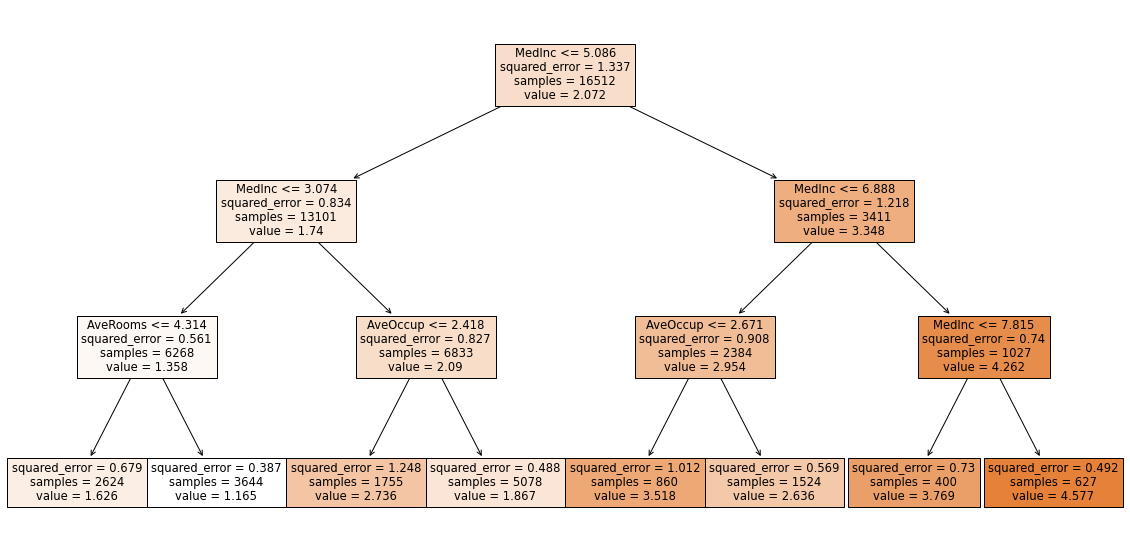

0.5097629887358219

In [10]:
X = data.drop(['MedHouseVal'], axis=1) 
y = data["MedHouseVal"]
get_metrics(X, y, method='Tree', max_depth = 3, dtreeprint = 'yes')

> Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

In [11]:
# data = data.drop(['Population'], axis=1) 
data['AveRooms'] = scaler.fit_transform(data[['AveRooms']])
X = data.drop(['MedHouseVal'], axis=1) 
y = data["MedHouseVal"]

In [12]:
def opt_best_deph(max_depth = 10):
    '''
    поиск наилучшей глубины дерева, по оценке качества, 
    как только оценка падает, выводиться глубина и сама оценка
    '''
    best_score = -1
    best_depth = None
    max_score = -1
    decrease_count = 0
    for i in range(1, max_depth+1):
        score_test = get_metrics(X, y, method='Tree', max_depth = i)
        if score_test > best_score:
            best_score = score_test
            best_depth = i
            decrease_count = 0
            if score_test > max_score:
                max_score = score_test
        # else:
        #     decrease_count += 1
        #     if decrease_count == 3:
        #         print(f"Maximum score achieved: {max_score}")
        #         break
    print(f"Best depth: {best_depth}, Best score: {best_score}")

In [13]:
opt_best_deph()

Best depth: 9, Best score: 0.6832529836308363


> Выведем еще для сравнения скор для модели линейной регрессии, с измененными ранее параметрами

In [14]:
get_metrics(X, y)

0.5757877060324499

> ### ВЫВОД Итоговый <br>
> 1. При одинаковых условиях и данных, модель линейной регрессии (на тех данных что у нас есть) уступает модели дерева решений.
> 2. При оптимизации данных, мы их делали нескольо раз, оценка и качество модели улучшается.
> 3. Для дерева решений есть пороговое значение максимальной глубины, когда качество модели начинает ухудшаться.